In [1]:
import proplot as pplt
import numpy as np
import fitsio
import meds
import yaml

## check input images

In [18]:
with open(
    "sim_outputs_plus_23/des-pizza-slices-y6-v15-nostars/pizza_cutter_info/DES0433-2332_r_pizza_cutter_info.yaml"
) as fp:
    pyml = yaml.safe_load(fp)

In [19]:
ind = 0
seyml = pyml["src_info"][ind]

In [20]:
bkg = fitsio.read(seyml["bkg_path"], ext=seyml["bkg_ext"])
wgt = fitsio.read(seyml["weight_path"], ext=seyml["weight_ext"])
im = fitsio.read(seyml["image_path"], ext=seyml["image_ext"])
bmask = fitsio.read(seyml["bmask_path"], ext=seyml["bmask_ext"])

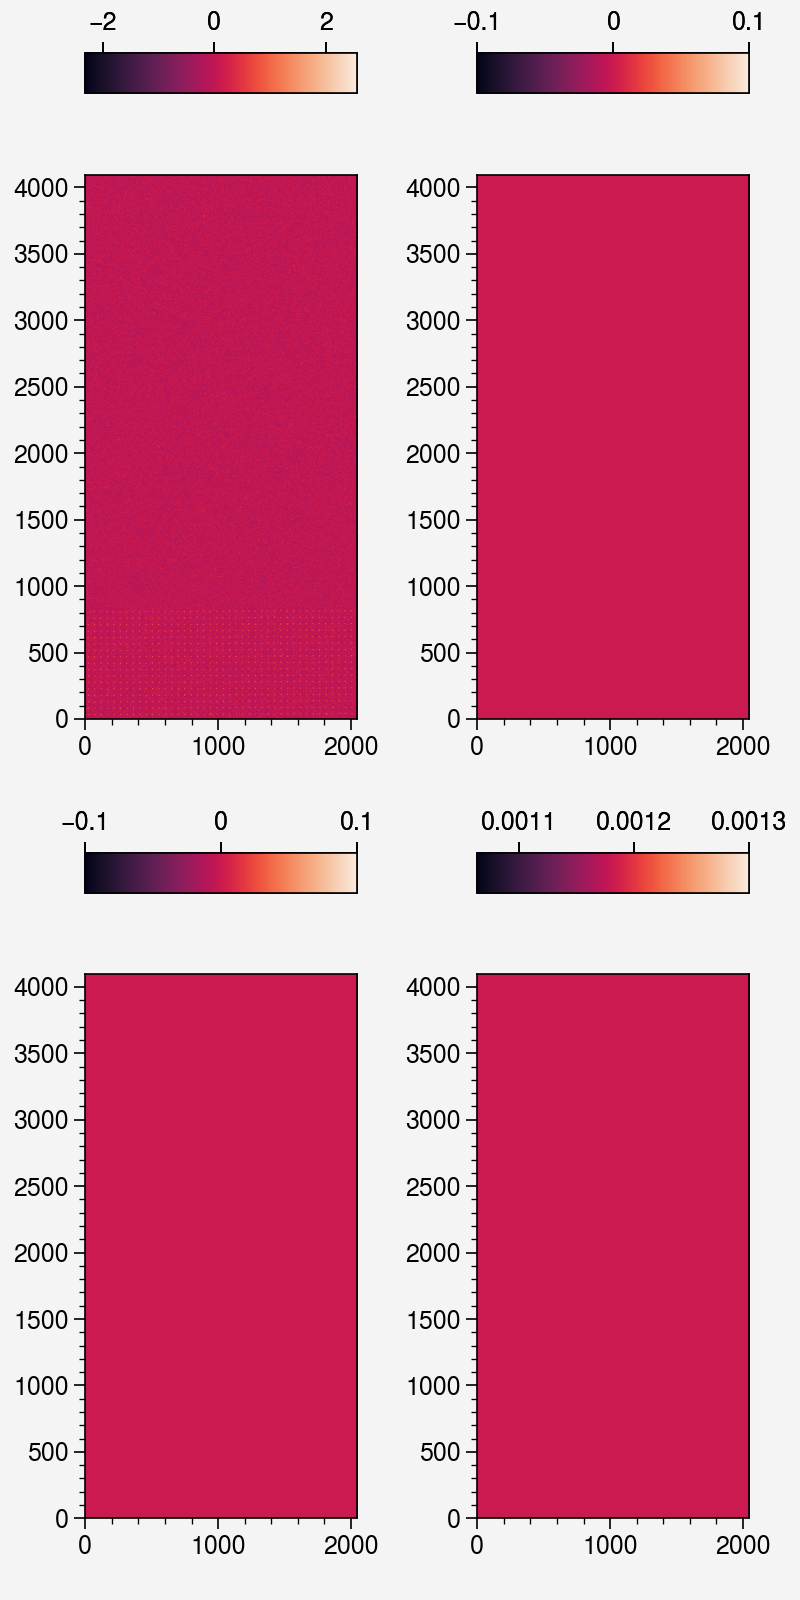

In [21]:
fig, axs = pplt.subplots(nrows=2, ncols=2, share=0, figsize=(4, 8))

m = axs[0, 0].imshow(np.arcsinh(im * np.sqrt(wgt)), origin="lower", cmap="rocket")
axs[0, 0].colorbar(m, loc="t")
axs[0, 0].grid(False)

m = axs[0, 1].imshow(np.arcsinh(bkg), origin="lower", cmap="rocket")
axs[0, 1].colorbar(m, loc="t")
axs[0, 1].grid(False)

m = axs[1, 0].imshow(bmask, origin="lower", cmap="rocket")
axs[1, 0].colorbar(m, loc="t")
axs[1, 0].grid(False)

m = axs[1, 1].imshow(wgt, origin="lower", cmap="rocket")
axs[1, 1].colorbar(m, loc="t")
axs[1, 1].grid(False)

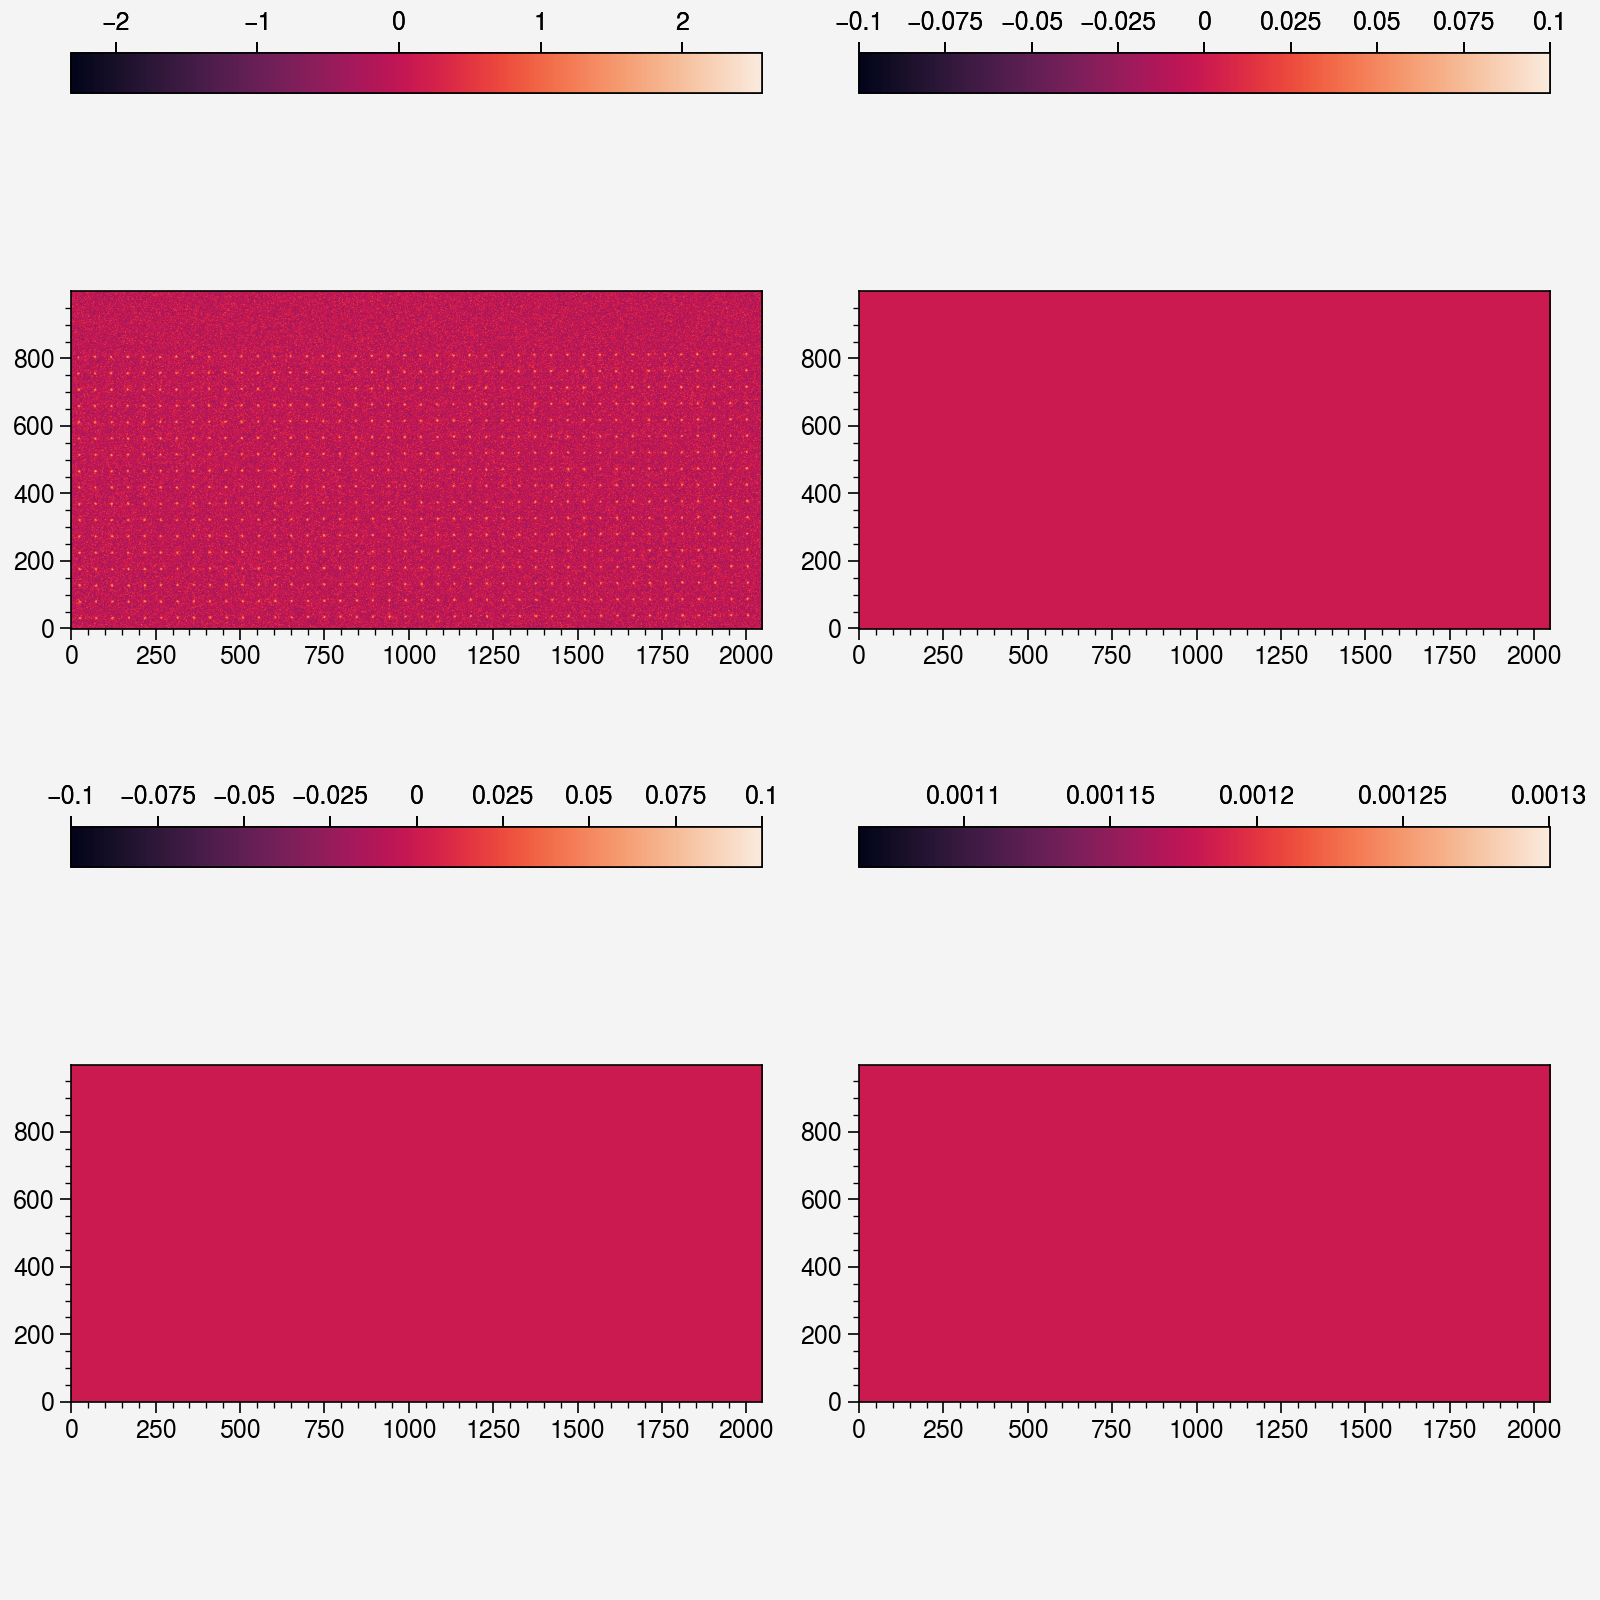

In [22]:
fig, axs = pplt.subplots(nrows=2, ncols=2, share=0, figsize=(8, 8))

m = axs[0, 0].imshow(np.arcsinh(im * np.sqrt(wgt))[:1000, :], origin="lower", cmap="rocket")
axs[0, 0].colorbar(m, loc="t")
axs[0, 0].grid(False)

m = axs[0, 1].imshow(np.arcsinh(bkg)[:1000, :], origin="lower", cmap="rocket")
axs[0, 1].colorbar(m, loc="t")
axs[0, 1].grid(False)

m = axs[1, 0].imshow(bmask[:1000, :], origin="lower", cmap="rocket")
axs[1, 0].colorbar(m, loc="t")
axs[1, 0].grid(False)

m = axs[1, 1].imshow(wgt[:1000, :], origin="lower", cmap="rocket")
axs[1, 1].colorbar(m, loc="t")
axs[1, 1].grid(False)

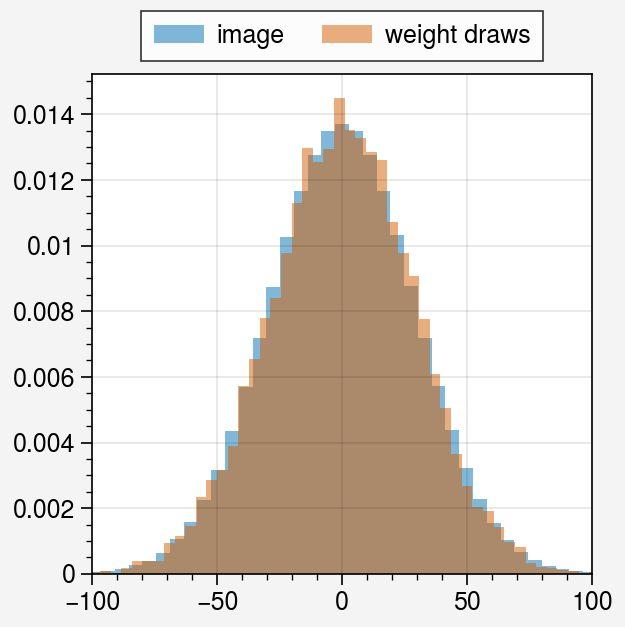

In [23]:
fig, axs = pplt.subplots()
axs.hist(im[3500:, :].flatten(), bins=50, density=True, label="image", alpha=0.5)
axs.format(xlim=(-100, 100))

rng = np.random.RandomState(seed=10)
imr = rng.normal(size=10000, scale=1.0/np.sqrt(wgt[0, 0]))
axs.hist(imr, bins=50, density=True, label="weight draws", alpha=0.5)

axs.legend(loc="t")

## check cell coadds

In [24]:
from ngmix.medsreaders import NGMixMEDS

In [26]:
pth = (
    "./sim_outputs_plus_23/des-pizza-slices-y6-v15-nostars/DES0433-2332/"
    "DES0433-2332_r_des-pizza-slices-y6-v15-nostars_meds-pizza-slices.fits.fz"
)
mf = NGMixMEDS(pth)

In [28]:
with fitsio.FITS(pth) as f:
    ei = f["epochs_info"][:]

inds = np.unique(ei["id"])
for ind in inds:    
    if np.sum(ei["id"] == ind) > 3:
        print(ind, np.sum(ei["id"] == ind))
        break

0 8


In [29]:
obsl = mf.get_obslist(ind)

im = obsl[0].image
wgt = obsl[0].weight
bmask = obsl[0].bmask
nse = obsl[0].noise

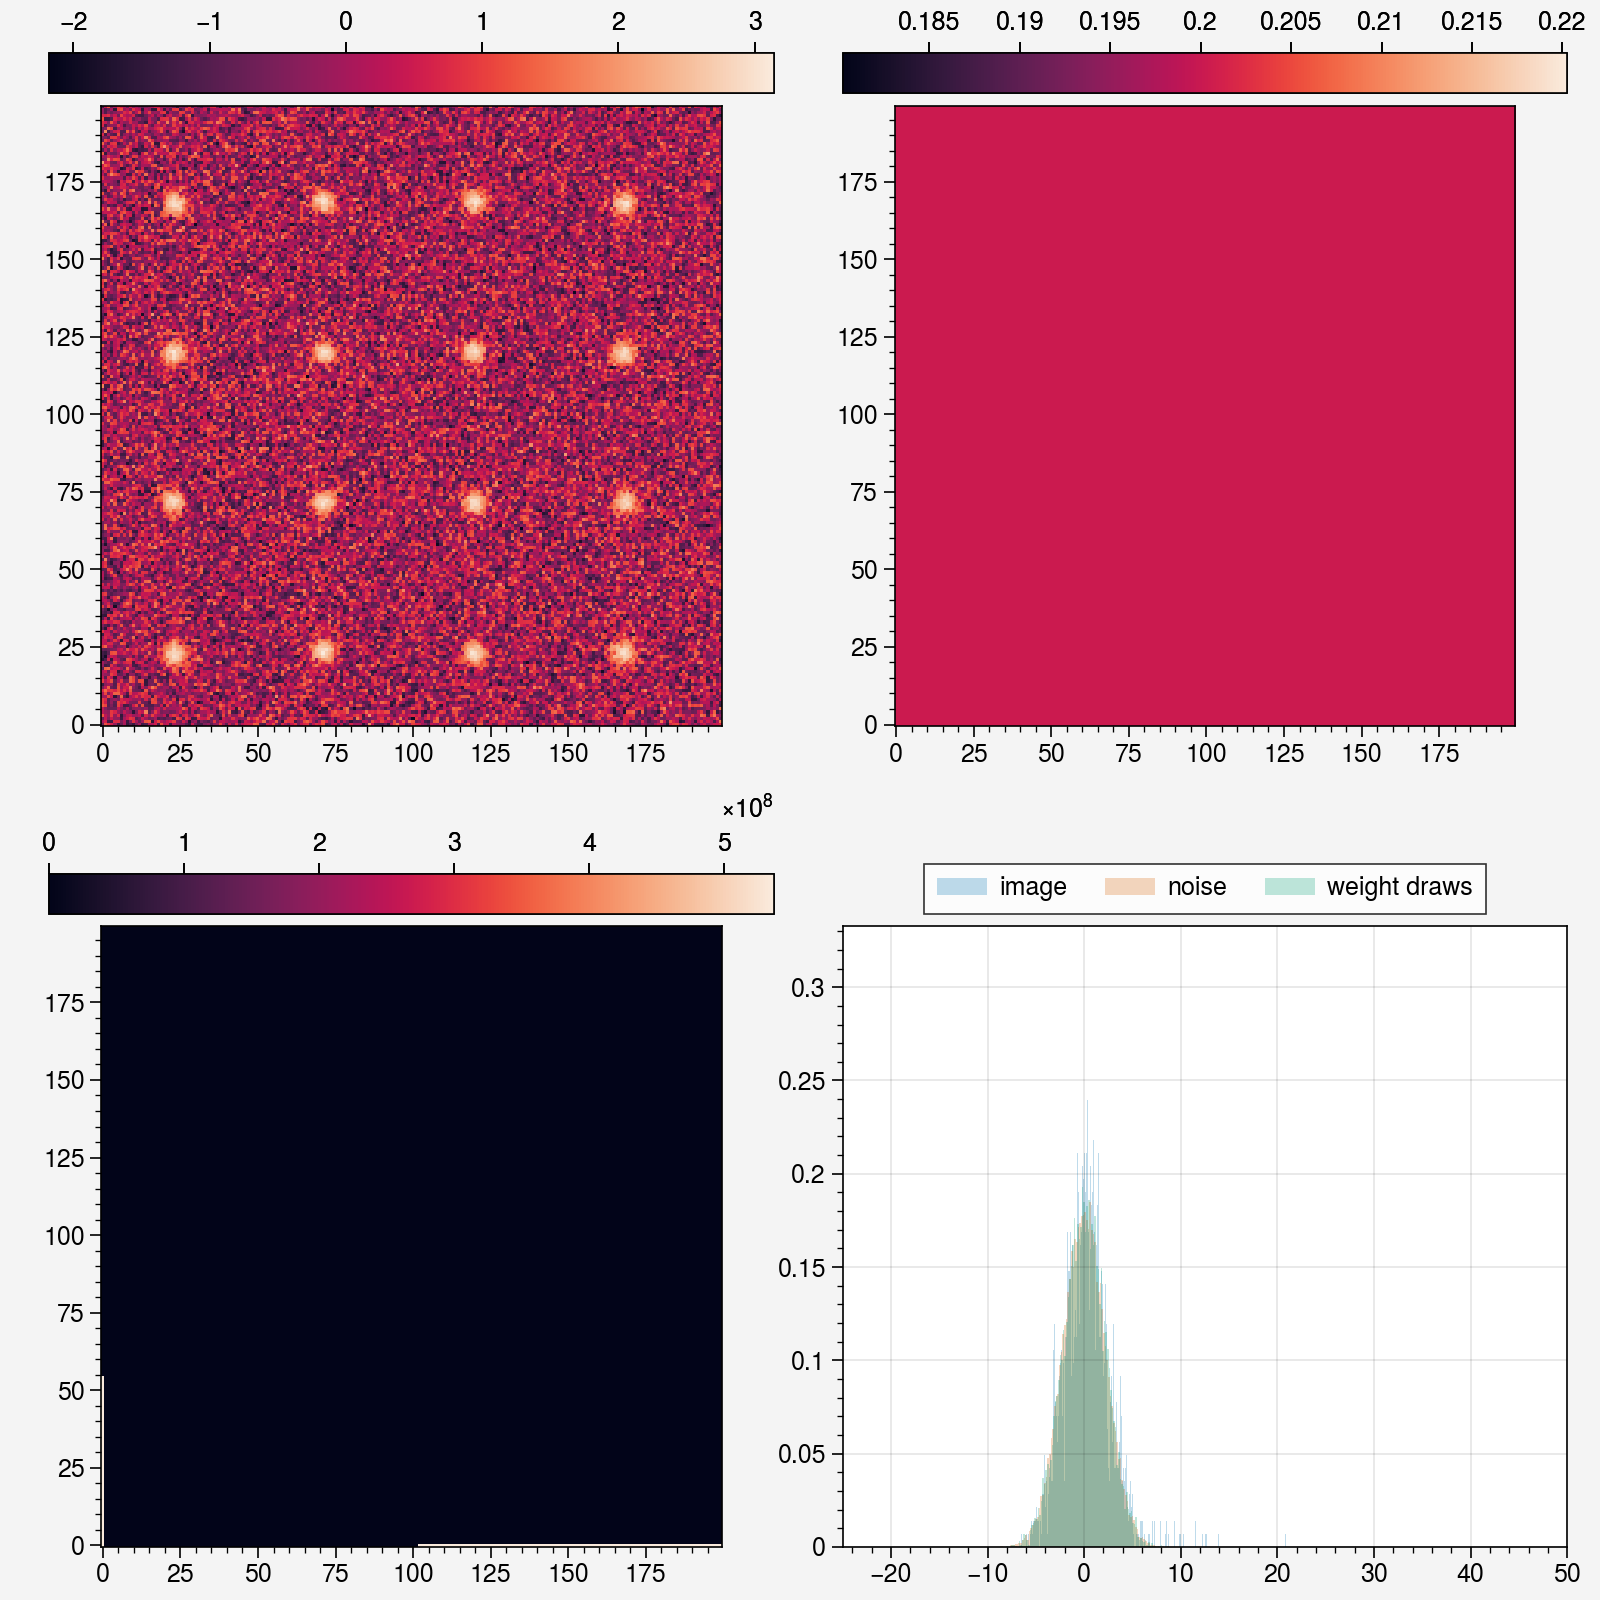

In [30]:
fig, axs = pplt.subplots(nrows=2, ncols=2, share=0, figsize=(8, 8))

m = axs[0, 0].imshow(np.arcsinh(im * np.sqrt(wgt)), origin="lower", cmap="rocket")
axs[0, 0].grid(False)
axs[0, 0].colorbar(m, loc="t")

m = axs[0, 1].imshow(wgt, origin="lower", cmap="rocket")
axs[0, 1].grid(False)
axs[0, 1].colorbar(m, loc="t")

m = axs[1, 0].imshow(bmask, origin="lower", cmap="rocket")
axs[1, 0].grid(False)
axs[1, 0].colorbar(m, loc="t")

axs[1, 1].hist(im.ravel(), bins=10000, density=True, label="image", alpha=0.25)
axs[1, 1].hist(nse.ravel(), bins=100, density=True, label="noise", alpha=0.25)

rng = np.random.RandomState(seed=10)
imr = rng.normal(size=10000, scale=1.0/np.sqrt(wgt[0, 0]))
axs[1, 1].hist(imr, bins=100, density=True, label="weight draws", alpha=0.25)

axs[1, 1].legend(loc="t")
axs[1, 1].format(xlim=(-25, 50))